In [ ]:
!pip install matplotlib --upgrade

In [32]:
import matplotlib
matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
import pandas as pd

In [33]:
import pandas as pd
import requests
import io

url = "https://raw.githubusercontent.com/caydenw21/BloomRadius/main/Week1Survey.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
surveydf = pd.read_csv(io.StringIO(download.decode('utf-8')))

url = "https://raw.githubusercontent.com/caydenw21/BloomRadius/main/plantedSeeds.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

seeds = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [34]:
seedChallenges = surveydf[['if I remembered to plant seeds', 'if I thought practicing would positively impact my life', 'if I felt more comfortable trying new things', 'if the seed recommendations were more personalized', 'if the planting process was easier', 'if I could better identify real-life seed planting opportunities']]
seedChallenges = seedChallenges.rename(columns={seedChallenges.columns[0]:'Forgetting', seedChallenges.columns[1]:'Perceived Impact', seedChallenges.columns[2]:'Fear of Trying', seedChallenges.columns[3]:'Lack of Personalization', seedChallenges.columns[4]:'Planting Proccess', seedChallenges.columns[5]:'Seed Oppurtunities'})

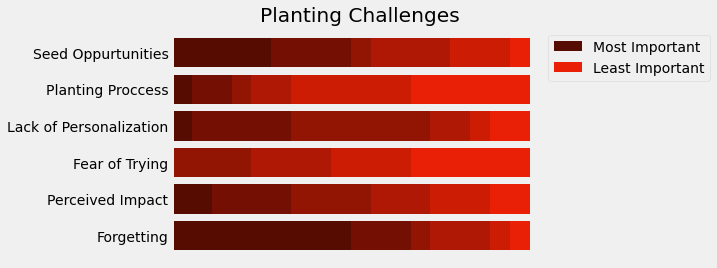

In [35]:
##FIRST VERSION
x1 = seedChallenges['Forgetting'].value_counts().sort_index()
x2 = seedChallenges['Perceived Impact'].value_counts().sort_index()
x3 = seedChallenges['Fear of Trying'].value_counts(dropna = False).sort_index()
x4 = seedChallenges['Lack of Personalization'].value_counts().sort_index()
x5 = seedChallenges['Planting Proccess'].value_counts().sort_index()
x6 = seedChallenges['Seed Oppurtunities'].value_counts().sort_index()
pieces = [x1, x2, x3, x4, x5, x6]
df_value_counts = pd.concat(pieces, axis=1)
df_value_counts['Fear of Trying'] = df_value_counts['Fear of Trying'].fillna(0).astype('int')

row0 = df_value_counts.iloc[0, :]
row1 = df_value_counts.iloc[1, :]
row2 = df_value_counts.iloc[2, :]
row3 = df_value_counts.iloc[3, :]
row4 = df_value_counts.iloc[4, :]
row5 = df_value_counts.iloc[5, :]

fig, ax = plots.subplots()
plots.barh(df_value_counts.columns, row0, color='#570C02')
plots.barh(df_value_counts.columns, row1, left=row0, color='#741003', label='_nolegend_')
plots.barh(df_value_counts.columns, row2, left=row0+row1, color='#921403', label='_nolegend_')
plots.barh(df_value_counts.columns, row3, left=row0+row1+row2, color='#AF1804', label='_nolegend_')
plots.barh(df_value_counts.columns, row4, left=row0+row1+row2+row3, color='#CC1C04', label='_nolegend_')
plots.barh(df_value_counts.columns, row5, left=row0+row1+row2+row3+row4, color='#E92005')
plots.title('Planting Challenges')
ax.legend(['Most Important','Least Important'], bbox_to_anchor=(1.45, 1), loc='upper right')
ax.tick_params(axis='both', which='major', bottom=False, labelbottom=False, grid_alpha=0)

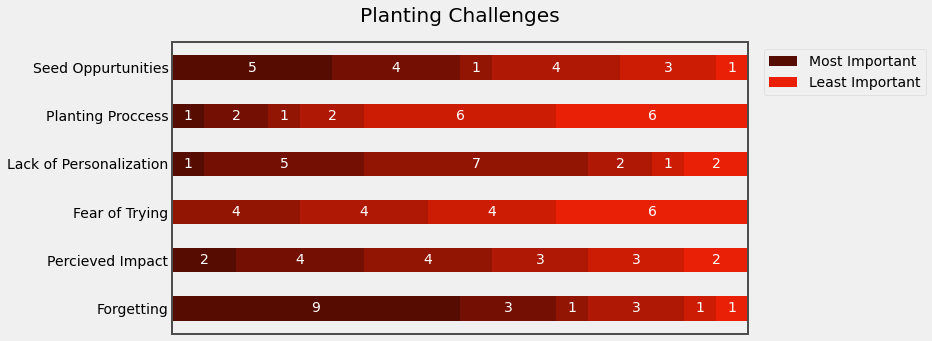

In [36]:
results = {
'Seed Oppurtunities':list(df_value_counts.iloc[:, 5]),
'Planting Proccess':list(df_value_counts.iloc[:, 4]),
'Lack of Personalization':list(df_value_counts.iloc[:, 3]),
'Fear of Trying':list(df_value_counts.iloc[:, 2]),
'Percieved Impact':list(df_value_counts.iloc[:, 1]),
'Forgetting':list(df_value_counts.iloc[:, 0])
}

category_names = df_value_counts.columns

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = ['#570C02', '#741003', '#921403', '#AF1804', '#CC1C04', '#E92005']
    fig, ax = plots.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(True)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    ax.tick_params(axis='both', which='major', bottom=False, labelbottom=False, grid_alpha=0)
    ax.spines['bottom'].set_color('0.3')
    ax.spines['top'].set_color('0.3')
    ax.spines['right'].set_color('0.3')
    ax.spines['left'].set_color('0.3')
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)


    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        if colname not in ['Seed Oppurtunities','Forgetting']:
          insertcol = '_nolegend_'
        else:
          insertcol = colname
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=insertcol, color=color)
        xcenters = starts + widths / 2

        for y, (x, c) in enumerate(zip(xcenters, widths)):
            if c !=0:
              ax.text(x, y, str(int(c)), ha='center', va='center',
                    color='white')
        plots.title('Planting Challenges', pad=20)
    ax.legend(['Most Important','Least Important'], bbox_to_anchor=(1.32, 1), loc='upper right')
    return fig, ax

survey(results, category_names)
plots.show()

In [37]:
uniqueSeeds = seeds[['Attribute','Category']].drop_duplicates().reset_index(drop=True)

In [38]:
attributeCount = seeds['Attribute'].value_counts().to_frame().rename(columns={'Attribute':'Count'})
attributeCount['Attribute'] = attributeCount.index
attributeCount = attributeCount.sort_values('Attribute').reset_index(drop=True)
attributeCount['Category'] = uniqueSeeds['Category']
attributeCount = attributeCount[['Attribute','Category','Count']].sort_values('Category').reset_index(drop=True)

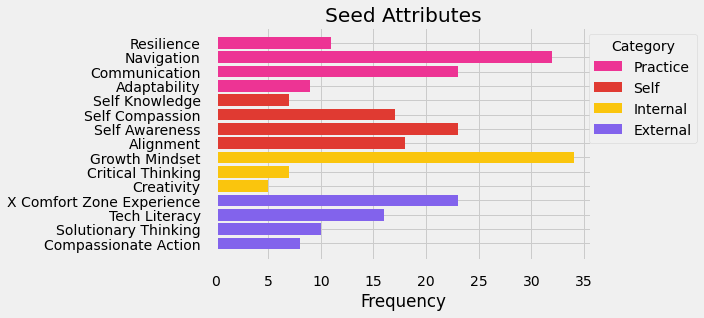

In [39]:
fig, ax = plots.subplots()
plots.barh(attributeCount[attributeCount['Category'] == 'External']['Attribute'], attributeCount[attributeCount['Category'] == 'External']['Count'], color='#8263ec', label='External')
plots.barh(attributeCount[attributeCount['Category'] == 'Internal']['Attribute'], attributeCount[attributeCount['Category'] == 'Internal']['Count'], color='#fac50d', label='Internal')
plots.barh(attributeCount[attributeCount['Category'] == 'Self']['Attribute'], attributeCount[attributeCount['Category'] == 'Self']['Count'], color='#e03a32', label='Self')
plots.barh(attributeCount[attributeCount['Category'] == 'Practice']['Attribute'], attributeCount[attributeCount['Category'] == 'Practice']['Count'], color='#ed3494', label='Practice')
ax.tick_params(axis='both', which='major', pad=15)
plots.xlabel('Frequency')
plots.title('Seed Attributes', loc='center',pad=5)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Category', bbox_to_anchor=(1.3, 1), loc='upper right')